<a href="https://colab.research.google.com/github/AlanJamey07/MLProjects/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
from google.colab import files
import pandas as pd
import io

# Upload the file
uploaded = files.upload()
# Get the actual filename from uploaded keys, handles cases where filename has extra chars like (4)
actual_filename = list(uploaded.keys())[0]
print(f"Uploaded file: {actual_filename}")
# Read the uploaded file using the actual filename
df = pd.read_csv(io.BytesIO(uploaded[actual_filename]))

# Display the dataframe
df.head()


Saving Ecommerce to Ecommerce (6)
Uploaded file: Ecommerce (6)


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [12]:
df.describe()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


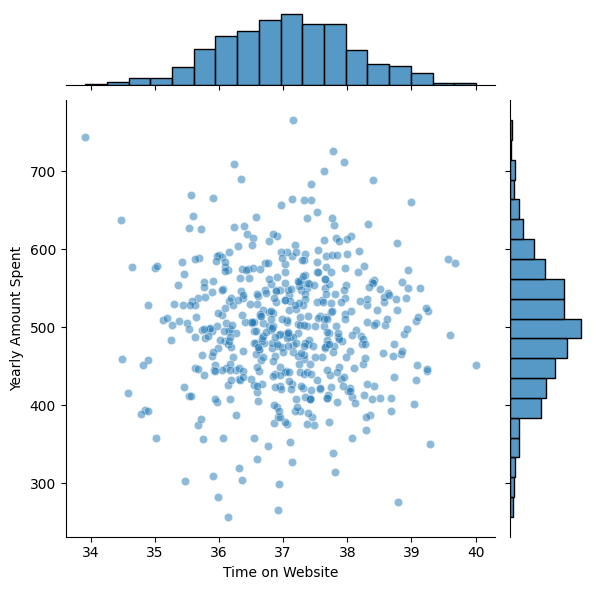

In [13]:
sns.jointplot(x="Time on Website" , y="Yearly Amount Spent" , data = df , alpha = 0.5)

In [14]:
from sklearn.model_selection import train_test_split

In [18]:
X= df[[	"Avg. Session Length" ,	"Time on App",	"Time on Website",	"Length of Membership",	"Yearly Amount Spent"]]
y = df["Yearly Amount Spent"]

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [21]:

X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
18,32.187812,14.715388,38.244115,1.516576,452.315675
361,32.077590,10.347877,39.045156,3.434560,401.033135
104,31.389585,10.994224,38.074452,3.428860,410.069611
4,33.330673,12.795189,37.536653,4.446308,599.406092
156,32.294642,12.443048,37.327848,5.084861,586.155870
...,...,...,...,...,...
147,32.255901,10.480507,37.338670,4.514122,479.731938
346,32.765665,12.506548,35.823467,3.126509,488.387526
423,33.128693,10.398458,36.683393,3.859818,461.112248
17,32.338899,12.013195,38.385137,2.420806,407.704548


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(X_train, y_train)

LinearRegression()

In [28]:
lm.coef_

array([-9.90230527e-15, -6.66133815e-15,  1.28618904e-15, -1.10551759e-14,
        1.00000000e+00])

In [29]:
cdf = pd.DataFrame(lm.coef_ , X.columns , columns=["Coeff"])

In [30]:
cdf

,Coeff
Avg. Session Length,-9.902305e-15
Time on App,-6.661338e-15
Time on Website,1.286189e-15
Length of Membership,-1.105518e-14
Yearly Amount Spent,1.000000e+00


In [32]:
predictions = lm.predict(X_test)
print(predictions)

[452.31567548 401.03313522 410.06961106 599.40609205 586.15587018
 535.48077519 588.71260551 712.39632681 462.89763615 532.72480546
 327.37795259 492.5568337  543.34016626 403.7669021  765.51846194
 537.84619527 708.93518487 501.92826487 564.79096901 571.21600483
 408.64035107 548.51852928 467.4278485  490.6004425  571.47103412
 410.60294395 534.77148495 368.65478495 540.26340041 443.44186006
 605.0610388  640.18774001 493.18021625 568.71757593 501.10024523
 560.44379217 447.68790654 432.48116856 436.58074035 461.92087689
 587.57479948 445.74984124 632.12358814 505.11334354 506.13234244
 518.06455798 577.73602485 541.97220376 356.61556789 472.99224667
 467.80092437 552.94034545 256.67058229 487.54750487 521.24078024
 304.13559158 507.39006179 387.35707274 478.88539132 426.15454771
 537.2150527  590.56271965 744.2218671  544.40927216 533.04006018
 439.99787994 434.02169975 502.4097853  642.10157873 476.19141335
 548.2803202  373.8857237  551.62014548 399.9838716  484.51980911
 503.97837

Text(0.5, 0, 'Predictions')

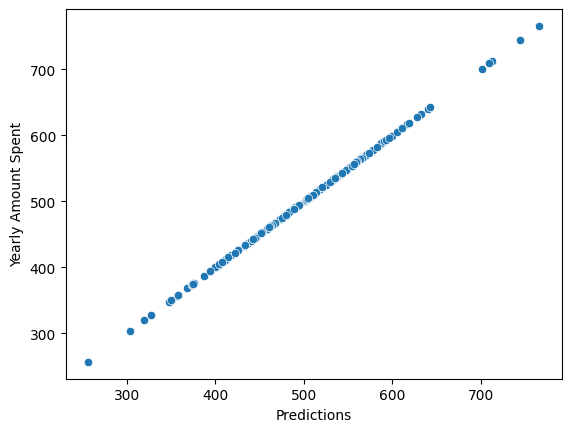

In [37]:
sns.scatterplot(x =predictions , y=y_test)
plt.xlabel("Predictions")


In [38]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [39]:
print("Mean Absolute error:" , mean_absolute_error(y_test,predictions))
print("Mean Squared error:" , mean_squared_error(y_test,predictions))
print("Root Mean Squared error:" , mean_squared_error(y_test,predictions)**0.5)

Mean Absolute error: 5.2295945351943376e-14
Mean Squared error: 5.816113682013476e-27
Root Mean Squared error: 7.626344918775623e-14


In [44]:
lm.predict(X_test.iloc[[0]]) # Use iloc to select the first row by position

array([452.31567548])